In [23]:
from google.colab import drive
import pandas as pd
import numpy as np
import cv2 as cv
import os
import dlib
from google.colab.patches import cv2_imshow
from PIL import Image
import math

In [21]:
drive.mount('/content/drive')
#@title fer2013 csv
shared_project_base_dir = 'My Drive/4A/CS486 Project' #@param {type:"string"}
full_project_dir = f"/content/drive/{shared_project_base_dir}"
msfde_dir = f"{full_project_dir}/raw_data/MSFDE"

Mounted at /content/drive


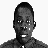

In [16]:
emotions = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
file_postfix_to_emotion_map = {
    ' ': emotions.index("Neutral"),
    'M': emotions.index("Neutral"), # hispanic files have an M instead of space for some reason
    '1': emotions.index("Angry"),
    '2': emotions.index("Happy"),
    '3': emotions.index("Sad"),
    '4': emotions.index("Fear"),
    '5': emotions.index("Disgust")
}

def get_processed_pixels_and_emotion(full_filename):
  filename = full_filename[full_filename.rfind('/') + 1:]
  emotion_key = filename[2]
  emotion = file_postfix_to_emotion_map.get(emotion_key)
  if emotion is None:
    return None, None
  pixels = cv.imread(full_filename, cv.IMREAD_GRAYSCALE)
  pixels = cv.resize(pixels, (48, 48))
  pixels = cv.equalizeHist(pixels) # img = preprocess_single_img(img)
  return pixels, emotion

pixels, emotion = get_processed_pixels_and_emotion(f"{msfde_dir}/African encoders/Male encoders/32 neutral.tif")
cv2_imshow(pixels)

In [17]:
for race in ("African", "Asian", "Caucasian", "Hispanic"):
  x_output = []
  y_output = []
  for sex in ("Female", "Male"):
    directory = f"{msfde_dir}/{race} encoders/{sex} encoders"
    for entry in os.scandir(directory):
      if not entry.path.endswith(".tif"):
        continue
      pixels, emotion = get_processed_pixels_and_emotion(entry.path)
      if emotion is not None:
        x_output.append(pixels)
        y_output.append(emotion)
  X = np.array(x_output)
  Y = np.array(y_output)
  np.save(f"{full_project_dir}/preprocessed_data/msfde_{race}_X", X)
  np.save(f"{full_project_dir}/preprocessed_data/msfde_{race}_Y", Y)

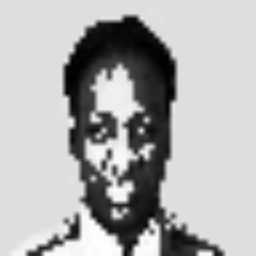

Disgust


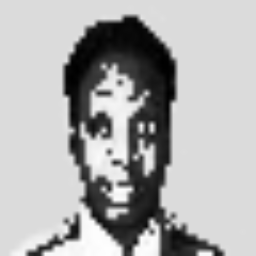

Fear


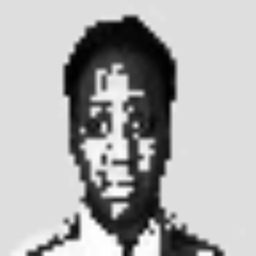

Sad


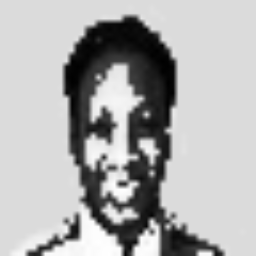

Happy


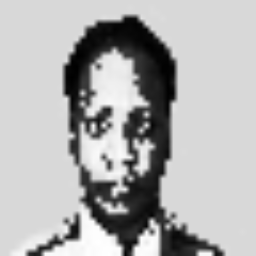

Angry


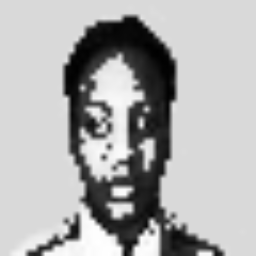

Neutral


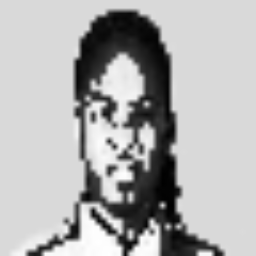

Disgust


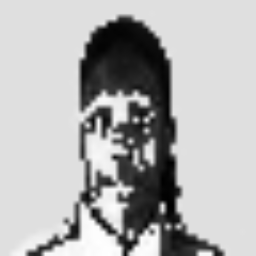

Fear


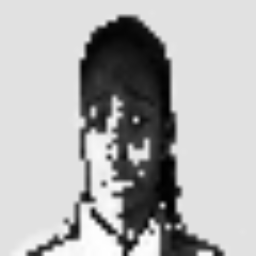

Sad


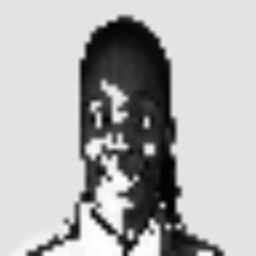

Happy


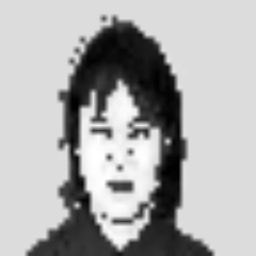

Disgust


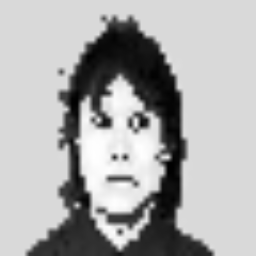

Fear


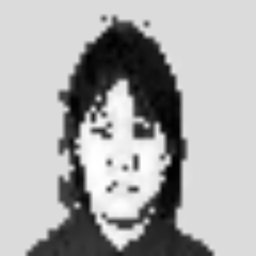

Sad


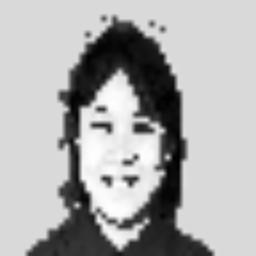

Happy


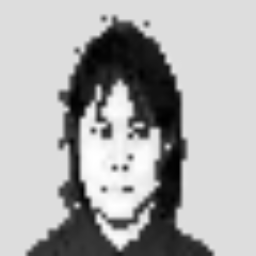

Angry


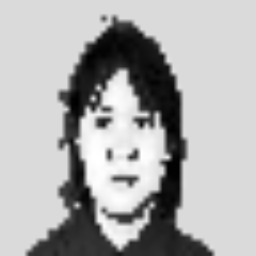

Neutral


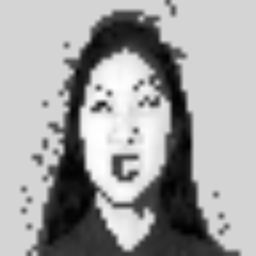

Disgust


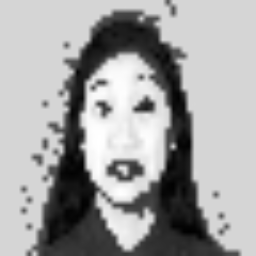

Fear


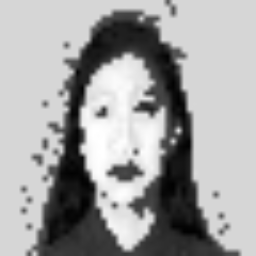

Sad


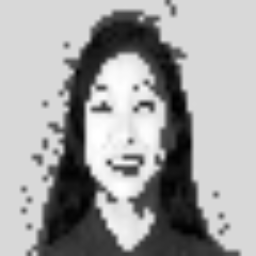

Happy


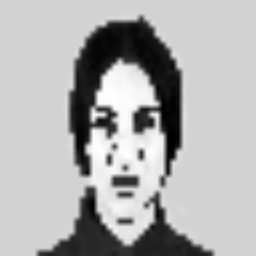

Disgust


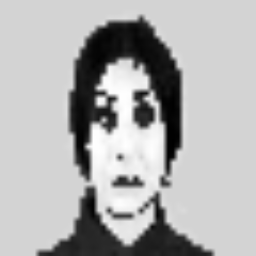

Fear


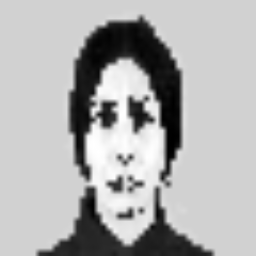

Sad


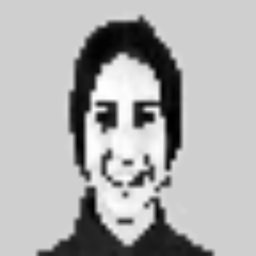

Happy


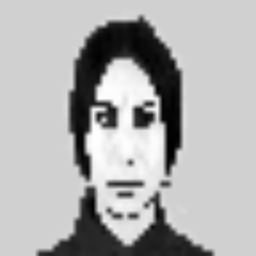

Angry


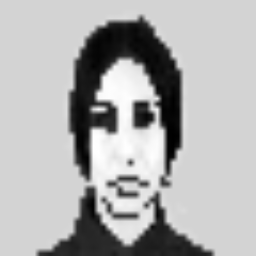

Neutral


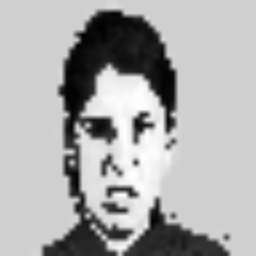

Disgust


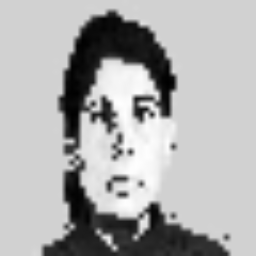

Fear


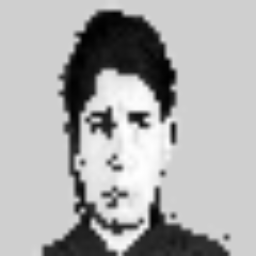

Sad


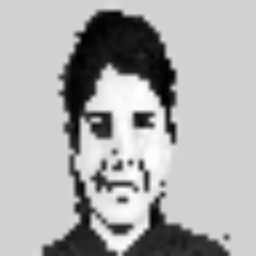

Happy


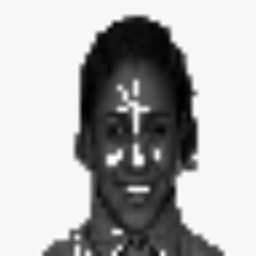

Happy


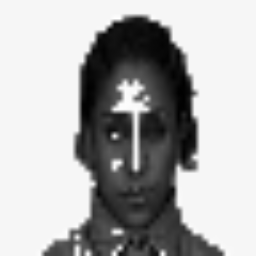

Neutral


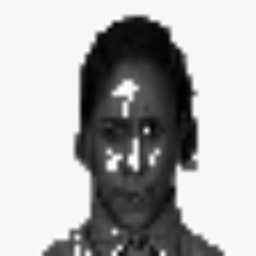

Angry


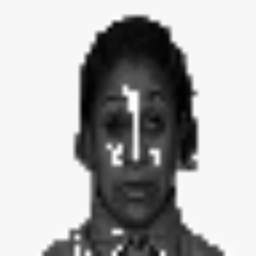

Fear


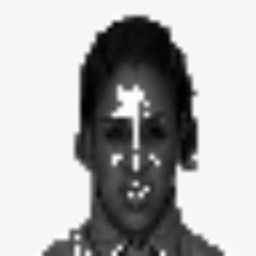

Disgust


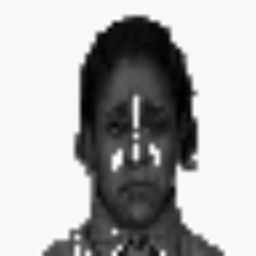

Sad


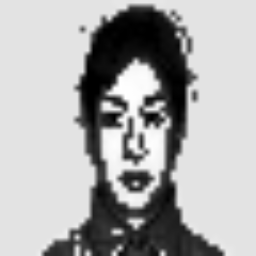

Neutral


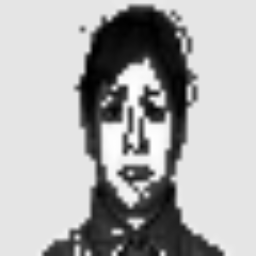

Sad


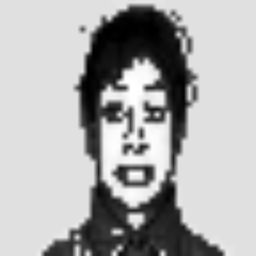

Fear


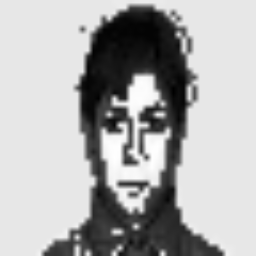

Angry


In [24]:
for race in ("African", "Asian", "Caucasian", "Hispanic"):
  test_X = np.load(f"{full_project_dir}/preprocessed_data/msfde_{race}_X.npy", allow_pickle=True)
  test_Y = np.load(f"{full_project_dir}/preprocessed_data/msfde_{race}_Y.npy", allow_pickle=True)

  for i in range(10):
    cv2_imshow(cv.resize(test_X[i], (256, 256)))
    print(emotions[test_Y[i]])

In [19]:
drive.flush_and_unmount()